### Важность признаков, получаемая с помощью модели на основе ансамбля деревьев решений.
Понадобится для пункта 3.1 первой части проекта.

### Необходимые модули

In [1]:
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Функция для визуализации важностей признаков

In [2]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

### Загрузка обученной модели RandomForestClassifier

In [3]:
with open('../models/model_RandomForestClassifier.dill', 'rb') as rf:
    rf_model = dill.load(rf)

Достаем из модели названия числовых признаков

In [4]:
num_features = rf_model[0].named_steps['preprocessor'].transformers_[0][2]
num_features

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

Достаем из модели названия категориальных признаков

In [5]:
cat_features = rf_model[0].named_steps['preprocessor'].transformers_[1][2]
cat_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Категориальные признаки в пайплайне преобразуются с помощью OneHotEncoding.<br>
Достаем названия преобразованных категориальных признаков

In [6]:
cat_features_ohe = rf_model[0].named_steps['preprocessor'].transformers_[1][1].named_steps['ohe'].get_feature_names(cat_features)
cat_features_ohe

array(['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up'], dtype=object)

Объединяем названия признаков в один список. В нашем пайплайне сначала преобразовываются числовые признаки, затем категориальные. И в преобразованном датасете признаки будут в том же порядке: сначала числовые, затем категориальные.

In [7]:
features_names = num_features + list(cat_features_ohe)
print(f'{len(features_names)}:{features_names}')

20:['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


Изобразим важности признаков на графике

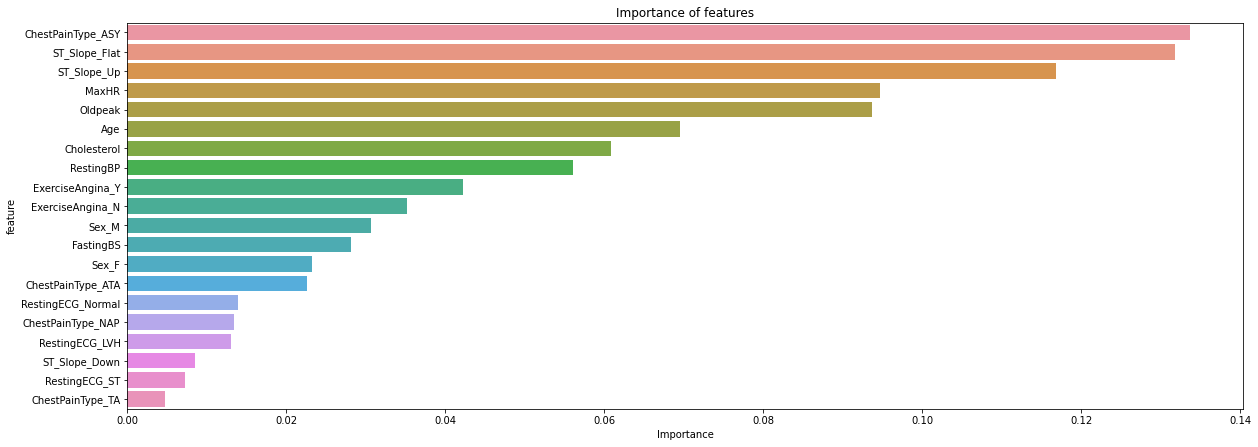

In [8]:
important_features_top = show_feature_importances(features_names,
                                                  rf_model[1].feature_importances_, get_top=20)

И выведем их в отсортированном по важности порядке

In [9]:
feature_importances = pd.DataFrame(data={'feature': features_names, 'importance': rf_model[1].feature_importances_})
feature_importances.sort_values(by=['importance'], ascending=False)

,feature,importance
8,ChestPainType_ASY,0.133717
18,ST_Slope_Flat,0.131842
19,ST_Slope_Up,0.116850
4,MaxHR,0.094642
5,Oldpeak,0.093689
0,Age,0.069535
2,Cholesterol,0.060810
1,RestingBP,0.056026
16,ExerciseAngina_Y,0.042212
15,ExerciseAngina_N,0.035229
